In [2]:
# Impoting libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
import statsmodels.api as sm
warnings.filterwarnings('ignore')

In [3]:
#Load the dataset
data = pd.read_csv(r"C:\Users\user\Downloads\yellow_tripdata_2020-01.csv")

### Exploratory Data Analysis

In [5]:
#check the first 5 rows
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [6]:
#check the number of rows and column
data.shape

(6405008, 18)

In [7]:
#check the data type
data.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [8]:
#change the data type from object to datetime for tpep_pickup_datetime and tpep_dropoff_datetime
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

In [9]:
data.dtypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

In [10]:
#describe the data
data.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,6.339567e+06,6405008,6405008,6.339567e+06,6.405008e+06,6.339567e+06,6.405008e+06,6.405008e+06,6.339567e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06
mean,1.669624e+00,2020-01-17 03:05:16.413242880,2020-01-17 03:21:13.417915904,1.515333e+00,2.929644e+00,1.059908e+00,1.647323e+02,1.626627e+02,1.270298e+00,1.269411e+01,1.115456e+00,4.923182e-01,2.189342e+00,3.488395e-01,2.979870e-01,1.866315e+01,2.275662e+00
min,1.000000e+00,2003-01-01 00:07:17,2003-01-01 14:16:59,0.000000e+00,-3.062000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.238000e+03,-2.700000e+01,-5.000000e-01,-9.100000e+01,-3.574000e+01,-3.000000e-01,-1.242300e+03,-2.500000e+00
25%,1.000000e+00,2020-01-09 17:10:53,2020-01-09 17:27:34.750000128,1.000000e+00,9.600000e-01,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.116000e+01,2.500000e+00
50%,2.000000e+00,2020-01-16 23:16:29,2020-01-16 23:32:24,1.000000e+00,1.600000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,1.950000e+00,0.000000e+00,3.000000e-01,1.430000e+01,2.500000e+00
75%,2.000000e+00,2020-01-24 18:24:30,2020-01-24 18:39:51,2.000000e+00,2.930000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.400000e+01,2.500000e+00,5.000000e-01,2.860000e+00,0.000000e+00,3.000000e-01,1.980000e+01,2.500000e+00
max,2.000000e+00,2021-01-02 01:12:10,2021-01-02 01:25:01,9.000000e+00,2.102401e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,4.265000e+03,1.130100e+02,3.080000e+01,1.100000e+03,9.105000e+02,3.000000e-01,4.268300e+03,2.750000e+00
std,4.703484e-01,NaN,NaN,1.151594e+00,8.315911e+01,8.118432e-01,6.554374e+01,6.991261e+01,4.739985e-01,1.212730e+01,1.260054e+00,7.374184e-02,2.760028e+00,1.766978e+00,3.385937e-02,1.475736e+01,7.352646e-01


In [11]:
#check the duration by subtracting the picku up time from the drop time and then substack
data['duration'] = data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']
data['duration']  = data['duration'].dt.total_seconds()/60 #convert duration to seconds

In [12]:
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0,2.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0,31.000000
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0,76.000000
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0,27.833333
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0,22.650000


In [13]:
#extracting the columns we need
data = data[['passenger_count', 'payment_type', 'fare_amount', 'trip_distance', 'duration']]
data

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.00,1.20,4.800000
1,1.0,1.0,7.00,1.20,7.416667
2,1.0,1.0,6.00,0.60,6.183333
3,1.0,1.0,5.50,0.80,4.850000
4,1.0,2.0,3.50,0.00,2.300000
...,...,...,...,...,...
6405003,NaN,NaN,17.59,3.24,31.000000
6405004,NaN,NaN,46.67,22.13,76.000000
6405005,NaN,NaN,48.85,10.51,27.833333
6405006,NaN,NaN,27.17,5.49,22.650000


In [14]:
#check for missing values
data.isnull().sum()

passenger_count    65441
payment_type       65441
fare_amount            0
trip_distance          0
duration               0
dtype: int64

In [15]:
# we have two options: drop missing values if the ratio to the whole data is less or fill it up if it is more
#checking the missing data length
(65441/len(data)) * 100

1.021716132126611

In [16]:
#since missing data is not much, we drop it
data.dropna(inplace = True)

In [17]:
data

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.0,1.20,4.800000
1,1.0,1.0,7.0,1.20,7.416667
2,1.0,1.0,6.0,0.60,6.183333
3,1.0,1.0,5.5,0.80,4.850000
4,1.0,2.0,3.5,0.00,2.300000
...,...,...,...,...,...
6339562,1.0,1.0,11.0,2.10,14.233333
6339563,1.0,1.0,13.0,2.13,19.000000
6339564,1.0,1.0,12.5,2.55,16.283333
6339565,1.0,2.0,8.5,1.61,9.633333


In [18]:
#convert passenger count from float to integer
data['passenger_count'] = data['passenger_count'].astype('int64')
data['payment_type'] = data['payment_type'].astype('int64')

In [19]:
data.dtypes

passenger_count      int64
payment_type         int64
fare_amount        float64
trip_distance      float64
duration           float64
dtype: object

In [20]:
#check for duplicates
data[data.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,duration
2056,1,2,7.0,0.00,0.000000
2441,1,1,52.0,0.00,0.200000
2446,2,1,9.5,1.70,13.066667
2465,1,1,4.0,0.40,3.083333
3344,1,1,6.0,1.20,5.350000
...,...,...,...,...,...
6339558,1,2,8.0,1.63,8.800000
6339559,1,1,8.5,1.81,8.016667
6339560,1,2,6.5,0.98,6.900000
6339562,1,1,11.0,2.10,14.233333


In [21]:
#drop duplicates
data.drop_duplicates(inplace = True)

In [22]:
data.shape

(3007861, 5)

In [23]:
#check the proportion of passengers 
data['passenger_count'].value_counts(normalize = True)

passenger_count
1    0.581981
2    0.190350
3    0.066360
5    0.062937
6    0.039272
4    0.036046
0    0.023033
7    0.000009
9    0.000006
8    0.000006
Name: proportion, dtype: float64

In [24]:
data['payment_type'].value_counts(normalize = True)

payment_type
1    6.782670e-01
2    3.075731e-01
3    8.721480e-03
4    5.438084e-03
5    3.324622e-07
Name: proportion, dtype: float64

In [25]:
data.shape

(3007861, 5)

In [26]:
data = data[data['payment_type'] < 3]
data = data[(data['passenger_count'] > 0) & (data['passenger_count'] < 6)]

In [27]:
data.shape

(2780283, 5)

In [28]:
#replace payment type 1 with cash and payment type 2 with card
data['payment_type'].replace([1,2], ['Card', 'Cash'], inplace = True)

In [29]:
data.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,1.780567e+01,4.536729e+00,2.415478e+01
std,1.176652e+00,1.506997e+01,4.895890e+00,9.260031e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,9.000000e+00,1.500000e+00,9.883333e+00
50%,1.000000e+00,1.300000e+01,2.730000e+00,1.573333e+01
75%,2.000000e+00,2.100000e+01,5.470000e+00,2.336667e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


In [30]:
# the min of fare_amount, trip_distance, and duration is negative, which shows they are outliers in the data.
data = data[data['fare_amount'] > 0]
data = data[data['trip_distance'] > 0]
data = data[data['duration'] > 0]

In [31]:
#remove outliers by using inter quartile
for col in ['fare_amount', 'trip_distance', 'duration']:
    q1 = data[col].quantile(0.25)  
    q3 = data[col].quantile(0.75)  
    IQR = q3 - q1

    lower_bound = q1 - 1.5 * IQR  
    upper_bound = q3 + 1.5 * IQR  

    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]


In [32]:
data

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4,Card,10.5,2.40,12.383333
6339555,3,Card,10.0,2.09,14.800000
6339561,1,Card,17.5,4.11,21.500000
6339563,1,Card,13.0,2.13,19.000000


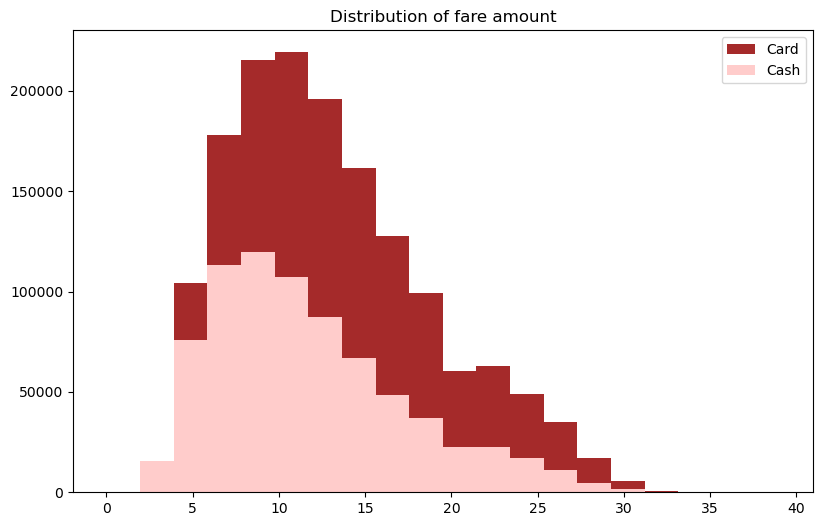

In [33]:
#checking if customers prefer cash or card using histogram visualization
plt.figure(figsize = (21, 6))
plt.subplot(1, 2, 1)
plt.title('Distribution of fare amount')
plt.hist(data[data['payment_type'] == 'Card'] ['fare_amount'], histtype = 'barstacked', bins = 20, color='#a52a2a', label='Card')
plt.hist(data[data['payment_type'] == 'Cash'] ['fare_amount'], histtype = 'barstacked', bins = 20, color='#ffcccb', label='Cash')
plt.legend()
plt.show()

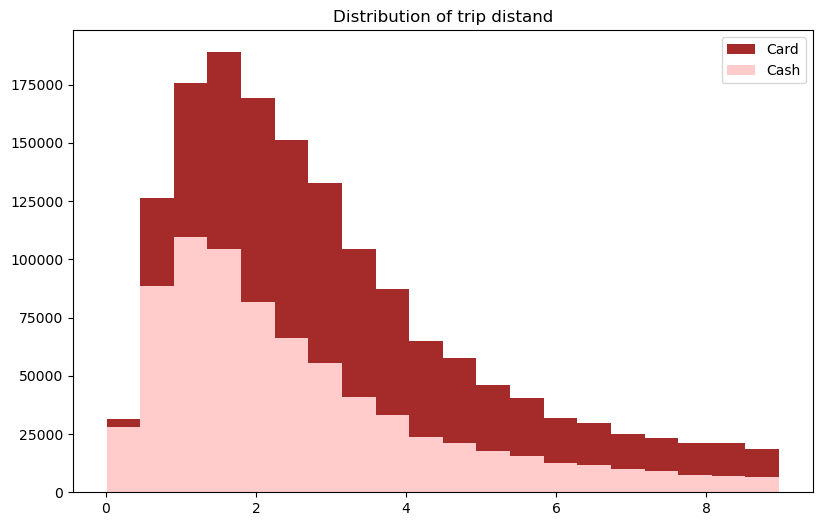

In [34]:
#checking the distribution of trip distance
plt.figure(figsize = (21, 6))
plt.subplot(1, 2, 1)
plt.title('Distribution of trip distand')
plt.hist(data[data['payment_type'] == 'Card'] ['trip_distance'], histtype = 'barstacked', bins = 20, color= '#a52a2a', label='Card')
plt.hist(data[data['payment_type'] == 'Cash'] ['trip_distance'], histtype = 'barstacked', bins = 20, color= '#ffcccb', label='Cash')
plt.legend()
plt.show()

In [42]:
#calculating the average and standard deviation of both fare_amount and trip_distance for each payment type 
dt = data.groupby('payment_type').agg({'fare_amount': ['mean', 'std'], 'trip_distance': ['mean', 'std']})
dt

fare_amount           trip_distance         
                    mean       std          mean      std
payment_type                                             
Card           13.112493  5.849281      2.992237  1.99274
Cash           11.758005  5.613038      2.602207  1.91372

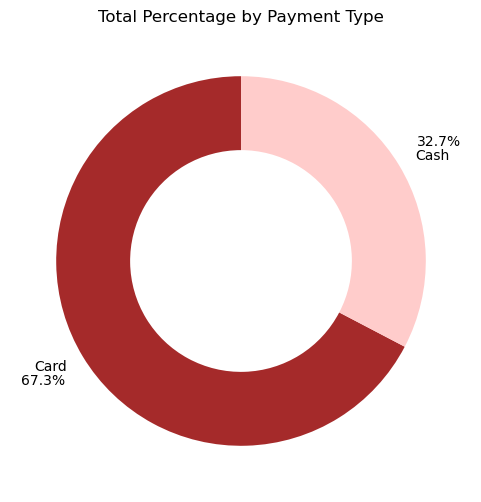

In [44]:
#Visulaize to show the total percentage share of each payment type
payment_counts = data['payment_type'].value_counts(normalize=True)
plt.figure(figsize=(6, 6))
plt.title('Total Percentage by Payment Type')
wedges, texts, autotexts = plt.pie(
    payment_counts,
    labels=payment_counts.index,
    startangle=90,
    autopct='%1.1f%%',
    colors=['#a52a2a', '#ffcccb'],
    wedgeprops={'width': 0.4}, 
    labeldistance=1.1,   
    pctdistance=1.25       
)
plt.show()

In [46]:
#check the distribution cost
passenger_count = data.groupby(['payment_type', 'passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns = {'passenger_count': 'count'}, inplace = True)
passenger_count.reset_index(inplace = True)

In [47]:
#get the percentage
passenger_count['perc'] = (passenger_count['count'] / passenger_count['count'].sum()) * 100

In [50]:
passenger_count

,payment_type,passenger_count,count,perc
0,Card,1,909245,39.568381
1,Card,2,327661,14.259100
2,Card,3,122412,5.327106
3,Card,4,63676,2.771042
4,Card,5,124045,5.398171
5,Cash,1,460550,20.042143
6,Cash,2,155472,6.765806
7,Cash,3,54506,2.371984
8,Cash,4,32715,1.423686
9,Cash,5,47626,2.072581


In [52]:
# Create an empty DataFrame with specified columns
dt = pd.DataFrame(columns=['payment_type', 1, 2, 3, 4, 5])
# Add two rows for 'Card' payment type
dt.loc[0] = ['Card'] + [None]*5
dt.loc[1] = ['Cash'] + [None]*5
# Fill in values from passenger_count
dt.iloc[0, 1:] = passenger_count.iloc[0:5, -1].values
dt.iloc[1, 1:] = passenger_count.iloc[5:10, -1].values
# Display result
print(data)


         passenger_count payment_type  fare_amount  trip_distance   duration
0                      1         Card          6.0           1.20   4.800000
1                      1         Card          7.0           1.20   7.416667
2                      1         Card          6.0           0.60   6.183333
3                      1         Card          5.5           0.80   4.850000
5                      1         Cash          2.5           0.03   0.883333
...                  ...          ...          ...            ...        ...
6339550                4         Card         10.5           2.40  12.383333
6339555                3         Card         10.0           2.09  14.800000
6339561                1         Card         17.5           4.11  21.500000
6339563                1         Card         13.0           2.13  19.000000
6339564                1         Card         12.5           2.55  16.283333

[2297908 rows x 5 columns]


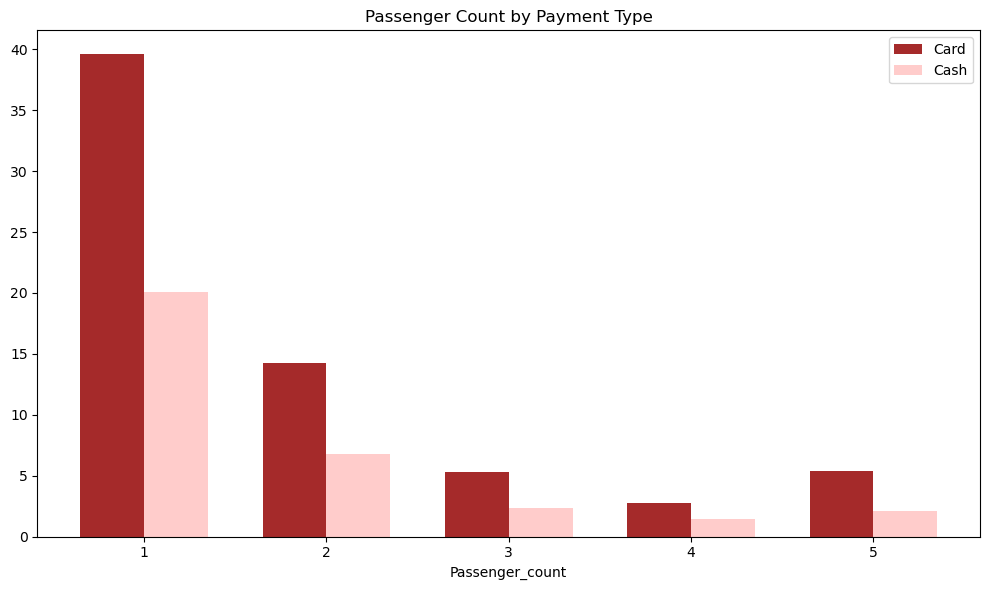

In [54]:
dt = pd.DataFrame(columns=['payment_type', 1, 2, 3, 4, 5])
dt.loc[0] = ['Card', 39.568381, 14.2591, 5.327106, 2.771042, 5.398171]
dt.loc[1] = ['Cash', 20.042143, 6.765806, 2.371984, 1.423686, 2.072581]
# Set index to payment_type
dt.set_index('payment_type', inplace=True)
# Plot setup
x_labels = [1, 2, 3, 4, 5]
x = range(len(x_labels))
bar_width = 0.35
# Get values
card_vals = dt.loc['Card'].values
cash_vals = dt.loc['Cash'].values
# Create figure
fig, ax = plt.subplots(figsize=(10, 6))
# Plot bars
ax.bar([i - bar_width/2 for i in x], card_vals, width=bar_width, label='Card', color= '#a52a2a')
ax.bar([i + bar_width/2 for i in x], cash_vals, width=bar_width, label='Cash', color='#ffcccb')
# Labels and formatting
ax.set_xlabel('Passenger_count')
ax.set_title('Passenger Count by Payment Type')
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.legend()
# Show
plt.tight_layout()
plt.show()

#### **Null hypothesis**: There is no difference in average fare between customers who use credit card and customers who use cash.
#### **Alternative hypothesis**: There is a difference in average far between customers who use credit cards and customers who use cash.

#### To find the type of distribution, we plot the Q-Q plot, if it aligns exactly on the diagonal, then it is a normal distributiom if it doesnt, then it is not a normal distribution.

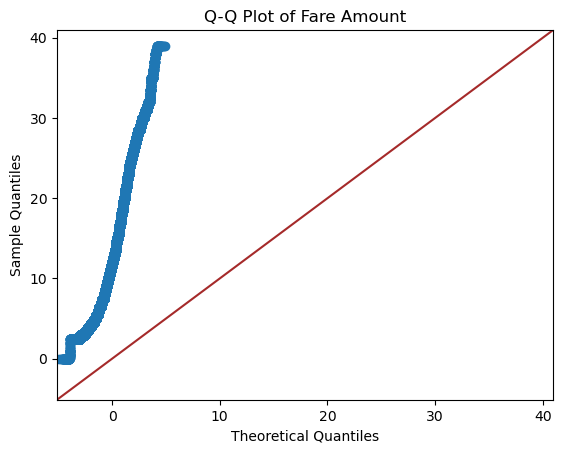

In [58]:
# Create the Q-Q plot object
qq = sm.qqplot(data['fare_amount'], line='45')  # This sets point color
# Change line color manually
line = qq.axes[0].lines[1]  
line.set_color('#a52a2a')
# Add labels and title
plt.title('Q-Q Plot of Fare Amount')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


In [59]:
card_sample = data[data['payment_type'] == 'Card'] ['fare_amount']
cash_sample = data[data['payment_type'] == 'Cash'] ['fare_amount']

In [60]:
t_stats, p_value = st.ttest_ind(a = card_sample, b = cash_sample, equal_var = False)
print('T-statistic', t_stats, 'p-value', p_value)

T-statistic 169.2111527245052 p-value 0.0


#### With the analysis above, the p-value is 0.0, therefore we reject null hypothesis